# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [143]:
#Import all the necessary modules
import numpy as np
import pandas as pd
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
#importing seaborn for statistical plots
from sklearn.model_selection import train_test_split
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


In [144]:
data = pd.read_csv("pima-indians-diabetes.csv")
data.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [145]:
data.tail()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


- From head and tail of the data it seems that the csv file has been loaded correctly. No corrective action is needed here. 

In [146]:
data.shape

(768, 9)

- There are 768 rows and 9 features (columns) in the dataset

In [147]:
pd.unique(data['class'])

array([1, 0])

- The class variable is the target variable. It has 2 unique classes - 0 and 1.

In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Preg     768 non-null int64
Plas     768 non-null int64
Pres     768 non-null int64
skin     768 non-null int64
test     768 non-null int64
mass     768 non-null float64
pedi     768 non-null float64
age      768 non-null int64
class    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


- There are no null values in the data set hence we can proceed without aby corrective action

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

# Q2. Print 10 samples from the dataset

In [149]:
data.sample(10)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
136,0,100,70,26,50,30.8,0.597,21,0
524,3,125,58,0,0,31.6,0.151,24,0
610,3,106,54,21,158,30.9,0.292,24,0
62,5,44,62,0,0,25.0,0.587,36,0
267,2,128,64,42,0,40.0,1.101,24,0
388,5,144,82,26,285,32.0,0.452,58,1
528,0,117,66,31,188,30.8,0.493,22,0
321,3,112,74,30,0,31.6,0.197,25,1
635,13,104,72,0,0,31.2,0.465,38,1
115,4,146,92,0,0,31.2,0.539,61,1


- The 10 samples randomly plotted show few of the columns have 0 data value. 

# Q3 Print the datatypes of each column and the shape of the dataset 

In [150]:
data.dtypes

Preg       int64
Plas       int64
Pres       int64
skin       int64
test       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

- The columns are all numeric type of data

There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


# Q4 Replace all the 0s in the column with the median of the same column value accordingly.

In [151]:
data.describe()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


From the describe function we see that all columns EXCEPT pedi and age have 0 values

The columns which can have 0 value without any entry error are:
    - Preg (seems to be times/months pregnant)
    - class is the target variable so that can legally have 0 and 1
Rest of the columns cannot take 0 and here I have chosen to replace them with median as all the columns are numeric without NaN values

In [152]:

data2= data[['Plas','Pres','skin','test','mass']].replace(0, np.nan)
data2 = pd.concat([data['Preg'], data2, data[['pedi','age','class']]], axis=1)
data2.head()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [153]:
data2 = data2.apply(lambda x:x.fillna(x.median()),axis = 0)

In [154]:
data2.describe()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


- Here we see that all the zeros of the data set have been replaced by medians

# Q5 Print the descriptive statistics of each & every column using describe() function

In [155]:
data2.describe().T

,count,mean,std,min,25%,50%,75%,max
Preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Plas,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
Pres,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
skin,768.0,29.108073,8.791221,7.000,25.00000,29.0000,32.00000,99.00
test,768.0,140.671875,86.383060,14.000,121.50000,125.0000,127.25000,846.00
mass,768.0,32.455208,6.875177,18.200,27.50000,32.3000,36.60000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


- As we replaced all zeros in columns with median we see that plas, pres, skin, test and mass now do not have 0 values
- Preg column:
    - Preg has mean of 3.84 and median of 3.0 which shows that there might be some skewnessin the data
    - Mostly slightly positively skewed
    - A boxplot will show more information 
- Plas column: 
    - Mean and median are close to each other with mean slightly more than median 
  
- Pres column:
    - Mean is 72 and median is also 72. This shows the distribution might be very clise to normal. 
    - However, it seems that there are high outliers as the max value is fairly high compared to rest of the data
- skin column:
    - The mean and median are very close to each other. Almost same as each other
    - However, the max value is very high (almost 3 times that of the 75%tile value)
    - High outliers present
- test column:
    - Mean is greater than meadian and with very high outliers
    - Positively skewed distribution
- mass column:
    - The mean and median are very close to each other
    - Max value high 
    - Presence of outliers
- pedi column:
    - Mean is greater than median 
    - max data is very high
    - May be positively skewed 
    - Outliers present
- age column:
    - People aged 21 and over are considerd
    - Oldest person is 82
    - Mean is greater than median 
    - May have higher percentage of older people in the data set 


# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

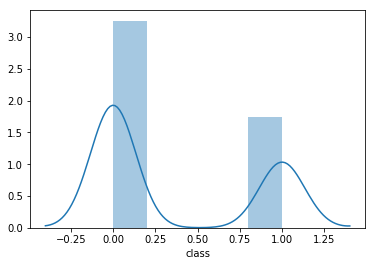

In [156]:
sns.distplot(data2['class'])

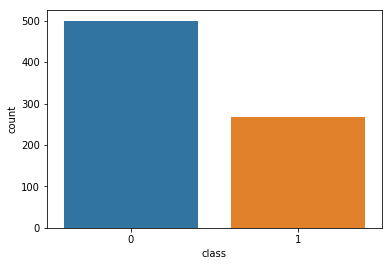

In [157]:
sns.countplot(data2['class']);
plt.show()

- It is seen here that there are 2 classes 0 and 1. There are more number of 0 than 1. 

#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

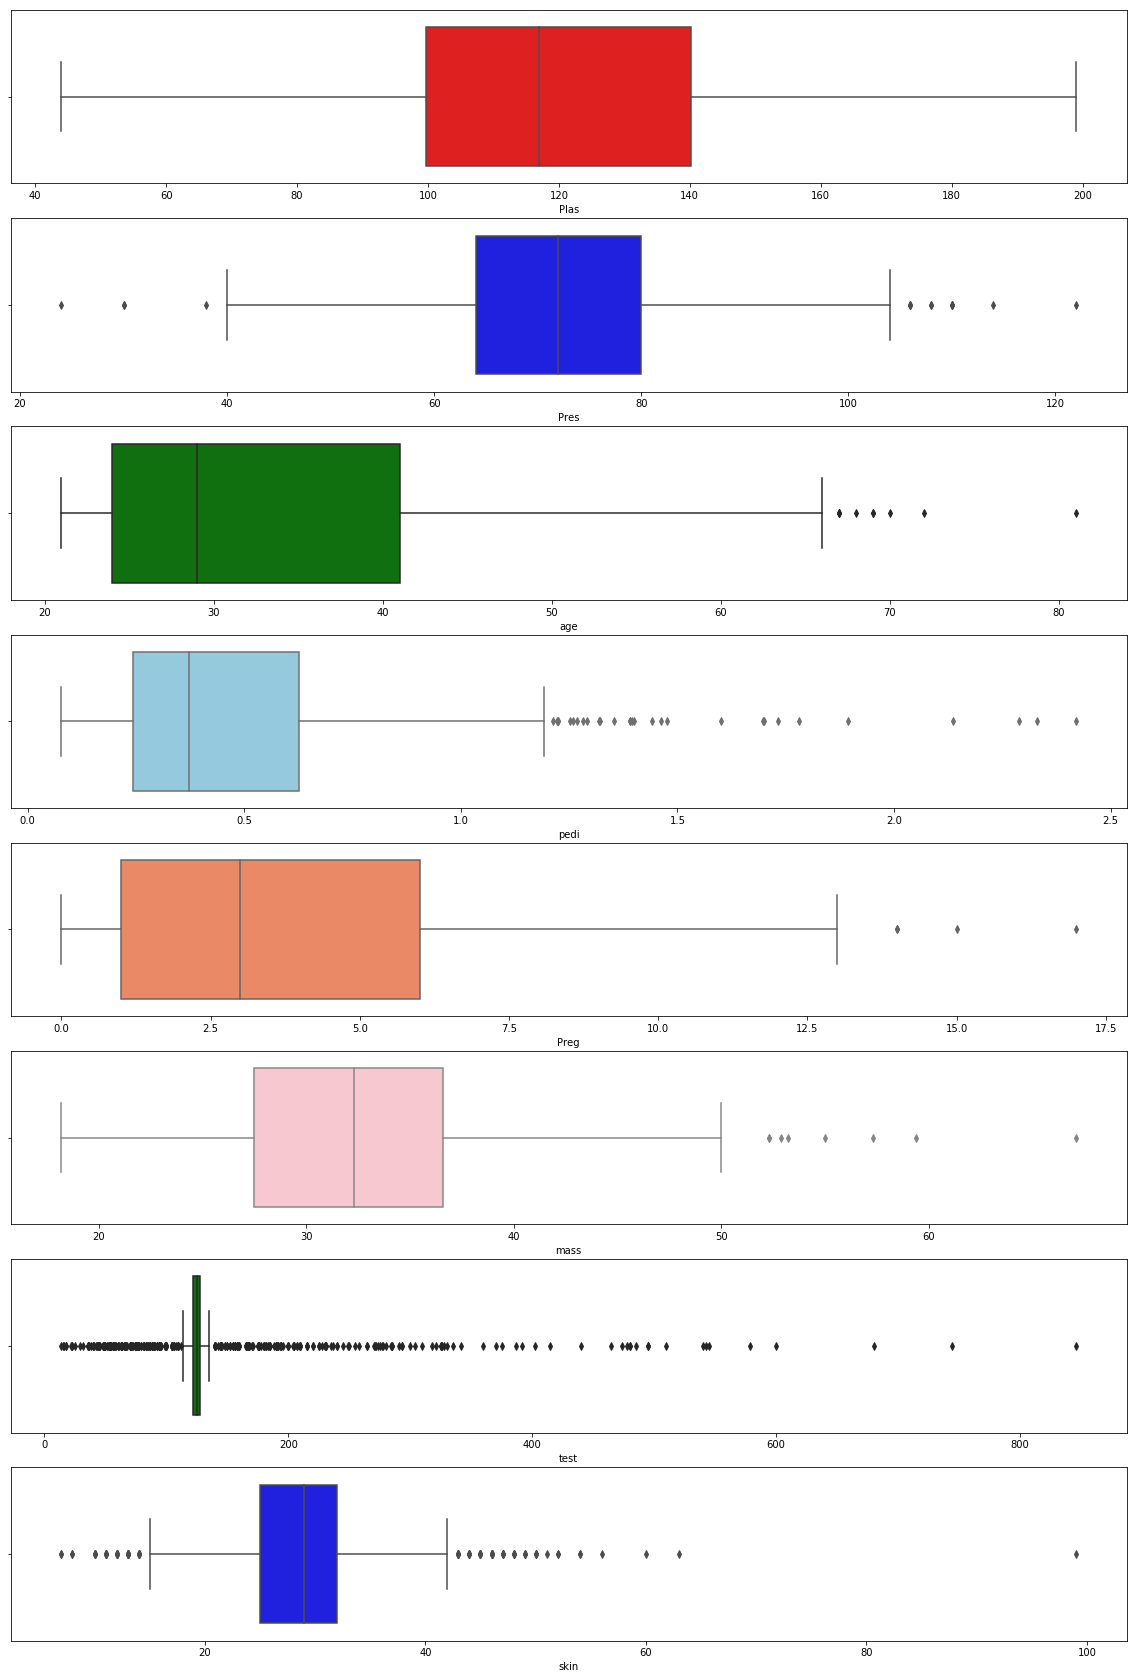

In [158]:
fig, axes = plt.subplots(nrows = 8, ncols = 1, figsize = (20,30))
sns.boxplot(data2['Plas'], color ='r', ax = axes[0]);
sns.boxplot(data2['Pres'], color = 'b', ax = axes[1]);
sns.boxplot(data2['age'], color = 'g', ax = axes[2]);
sns.boxplot(data2['pedi'], color = 'skyblue', ax = axes[3]);
sns.boxplot(data2['Preg'], color = 'coral', ax = axes[4]);
sns.boxplot(data2['mass'], color = 'pink', ax = axes[5]);
sns.boxplot(data2['test'], color = 'g', ax = axes[6]);
sns.boxplot(data2['skin'], color = 'b', ax = axes[7]);
plt.show()

- Preg column:
    - Mean is more than the median and there are high outliers 

- Plas column: 
    - Mean and median are close to each other with mean slightly more than median 
    - Distribution looks very normal
    
- Pres column:
    - Mean is 72 and median is also 72. This shows the distribution might be very clise to normal. 
    - There are both high and low outliers
    
- skin column:
    - However, the max value is very high (almost 3 times that of the 75%tile value)
    - High and outliers present
    
- test column:
    - There are many low and high outliers
    
- mass column:
    - The mean and median are very close to each other
    - Max value high 
    - Presence of high outliers
    
- pedi column:
    - Mean is greater than median 
    - max data is very high
    - May be positively skewed 
    - High Outliers present
    
- age column:
    - People aged 21 and over are considerd
    - Oldest person is 82
    - Mean is greater than median 
    - May have higher percentage of older people in the data set 
    - Some highh outliers



# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


In [159]:
data.corr()

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
Preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
Pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
test,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
mass,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


- Class varible does not have very high correlation with any of the variables
- Plas has the highest value (0.29)
- test and plas have some positive correlation
- Others do not have strong correaltion

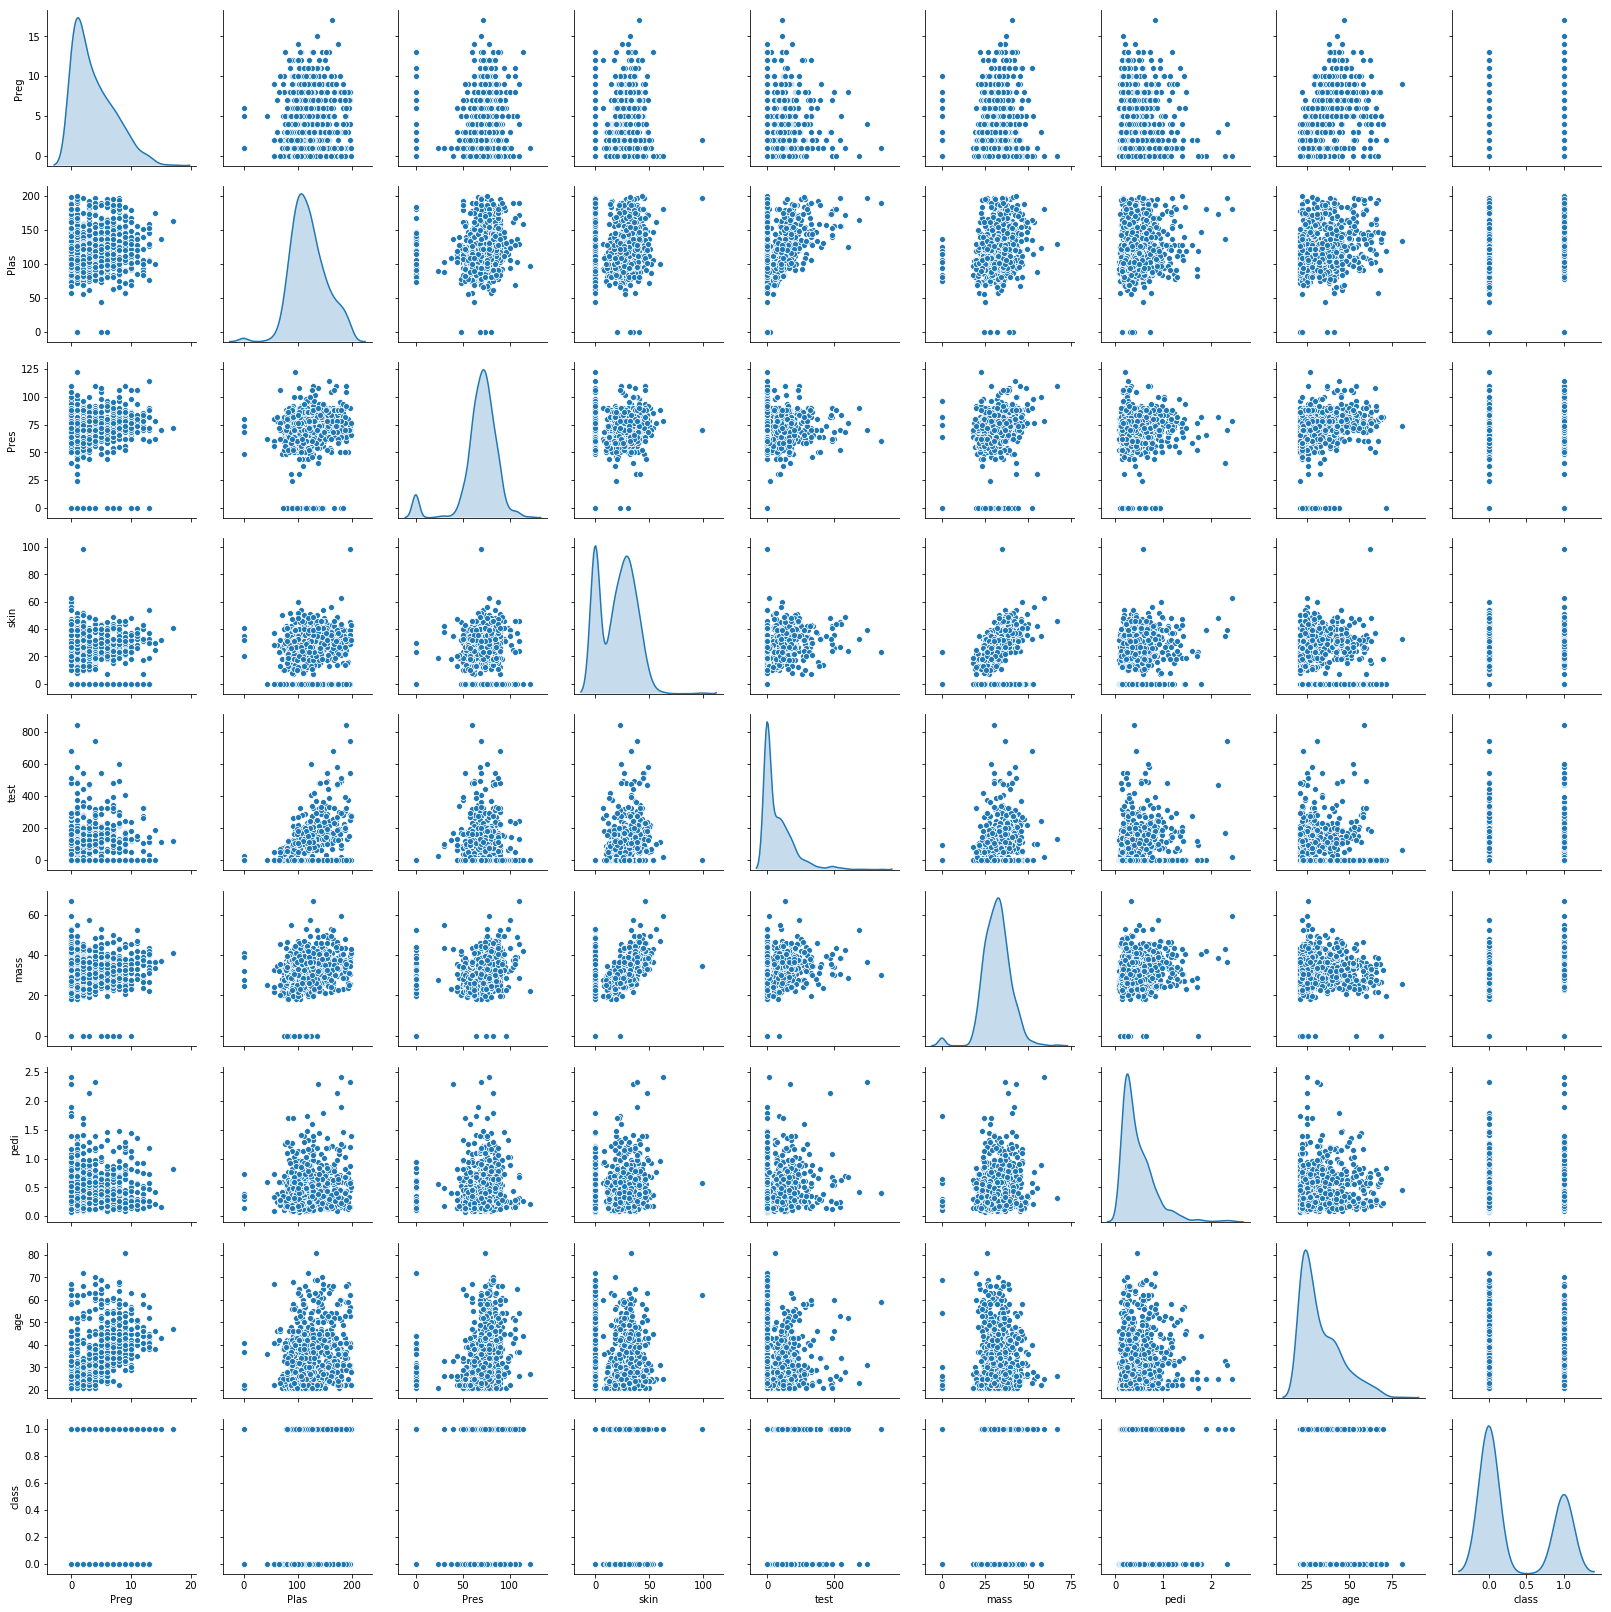

In [160]:
sns.pairplot(data, diag_kind = 'kde')

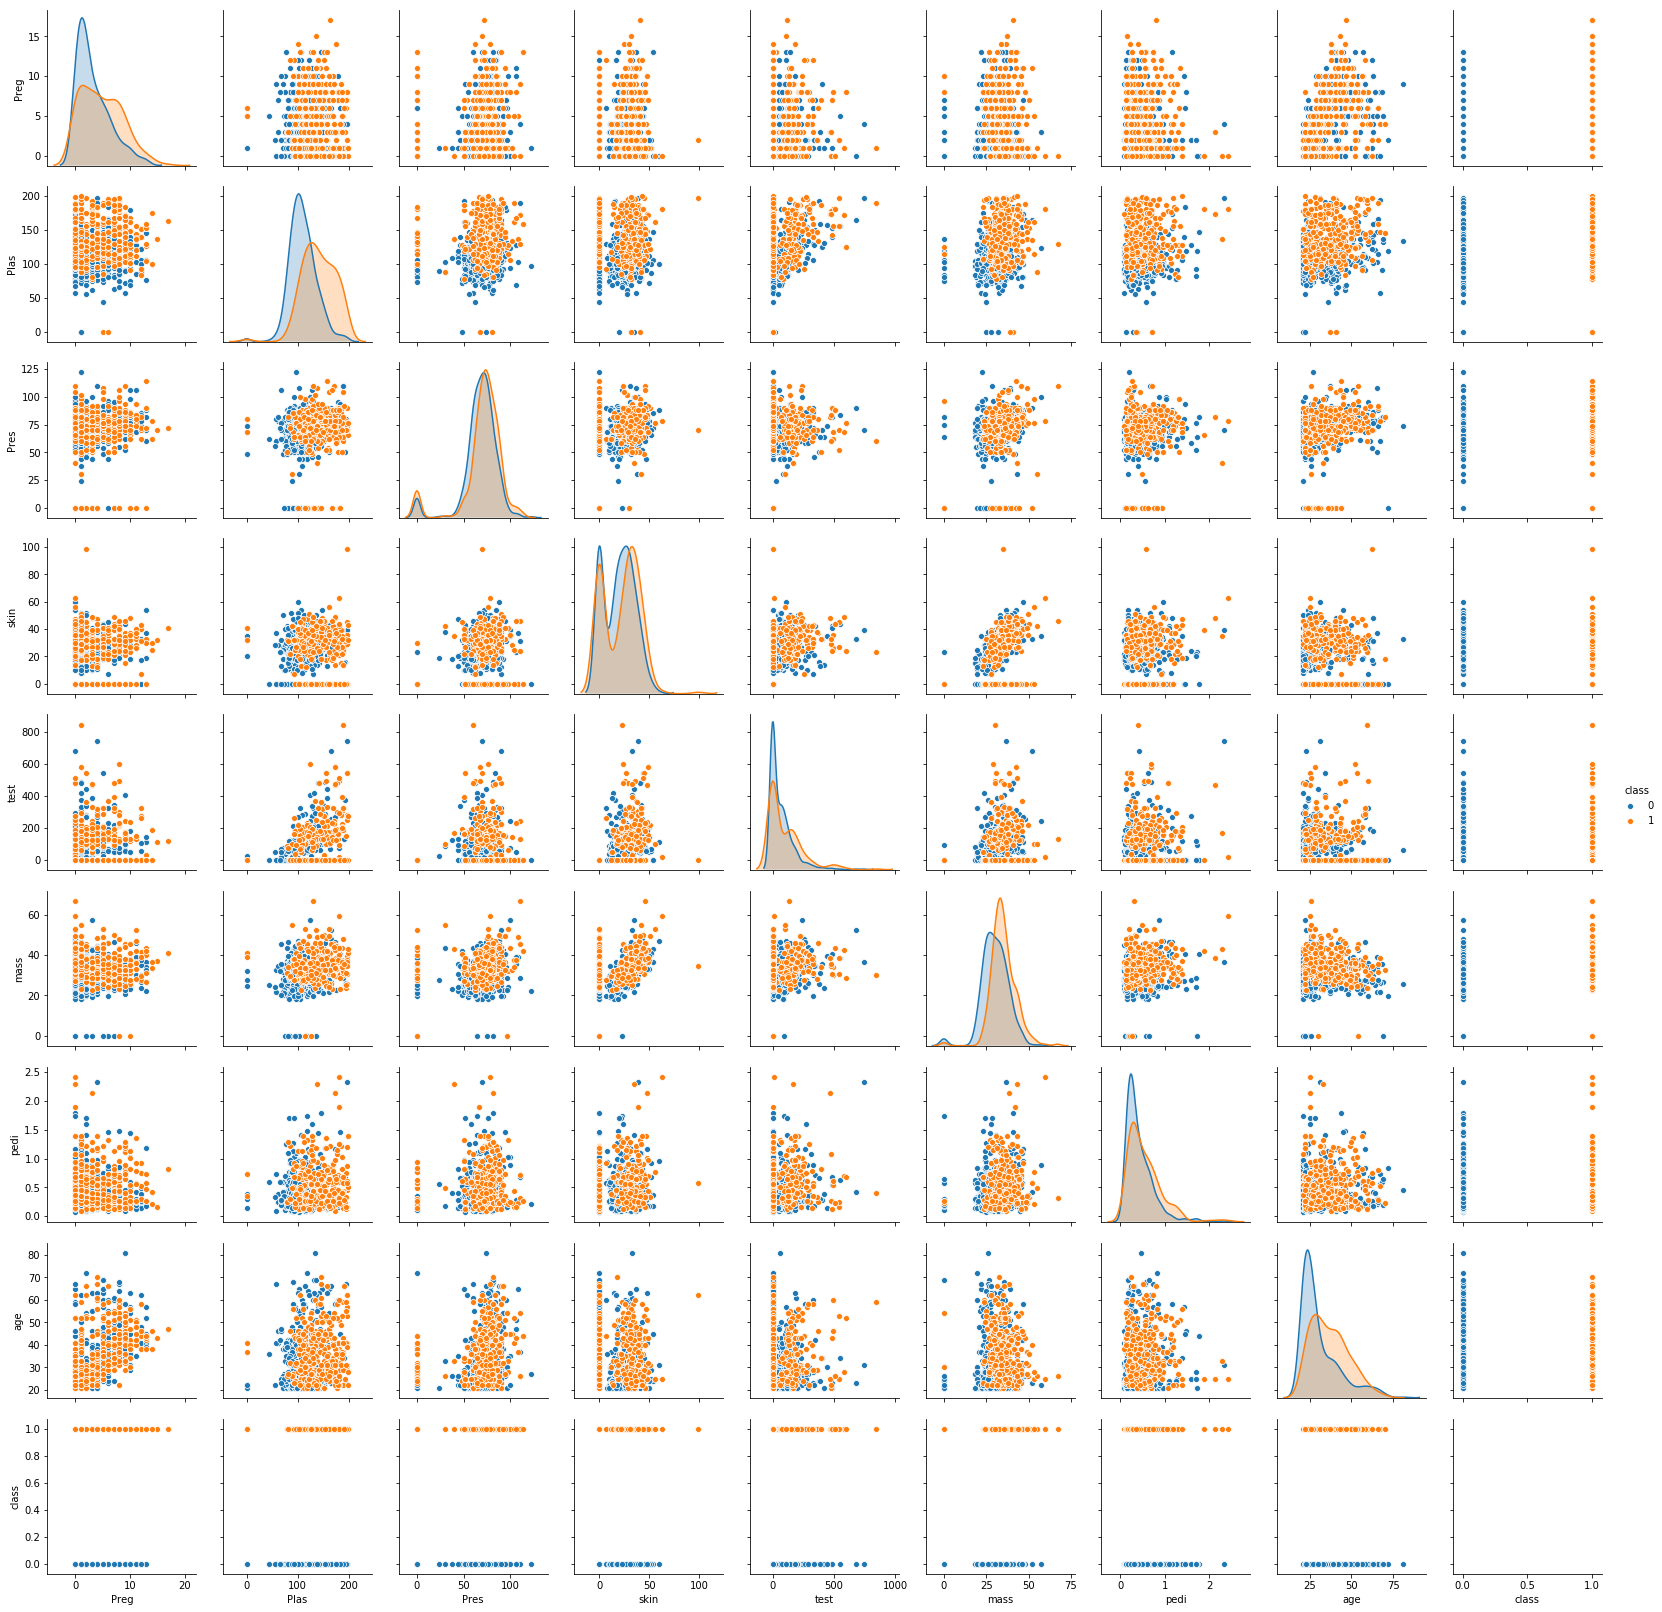

In [161]:
sns.pairplot(data, diag_kind = 'kde', hue = 'class')

### Major inferences from pair plots:
- There is no separation in the classes seen for the features
- Best separation is seen for Plas data
- This will result in poor classification accuracy
- Correlation between the variables are faily poor
- Press and skin are bimodal distributions 
- age has a fat tail showing hugh outliers
- Plas has some higher valies for class = 1 as compared to class = 0
- Some of the variable combinations have very little correlation with horizontal trends seens (Pres vs Age, Plas vs mass etc)

Using the plot - infer the relationship between different variables

# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [162]:
x = data.drop('class', axis = 1)
y = data['class']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

In [163]:
x_train.shape

(537, 8)

In [164]:
x_test.shape

(231, 8)

- Data has been split in to 70% test and 30% train 

# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



- The optimum depth of the decision tree is tested using 3 metrics (and cross validation) - accuracy, recall and f1 score

In [165]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
myList = list(range(2,10))
# empty list that will hold cv scores
cv_scores = []
max_depth = []
for k in myList:
    dt = DecisionTreeClassifier(criterion = 'entropy', max_depth=k)
    scores = cross_val_score(dt, x_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    max_depth.append(k)
MSE = [1 - x for x in cv_scores]
min(MSE)
MSE.index(min(MSE))
best_k = myList[MSE.index(min(MSE))]
print ("The optimal number of max_depth with accuracy metric is %d" % best_k)

The optimal number of max_depth with accuracy metric is 5


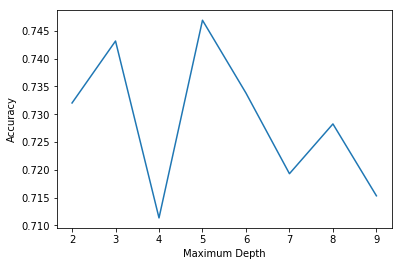

In [166]:
# plot misclassification error vs k
plt.plot(max_depth, cv_scores)
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')
plt.show()

In [167]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
myList = list(range(2,10))
# empty list that will hold cv scores
cv_scores = []
max_depth = []
for k in myList:
    dt = DecisionTreeClassifier(criterion = 'entropy',max_depth=k)
    scores = cross_val_score(dt, x_train, y_train, cv=10, scoring='recall')
    cv_scores.append(scores.mean())
    max_depth.append(k)
MSE = [1 - x for x in cv_scores]
min(MSE)
MSE.index(min(MSE))
best_k = myList[MSE.index(min(MSE))]
print ("The optimal number of max_depth with recall metric is %d" % best_k)

The optimal number of max_depth with recall metric is 5


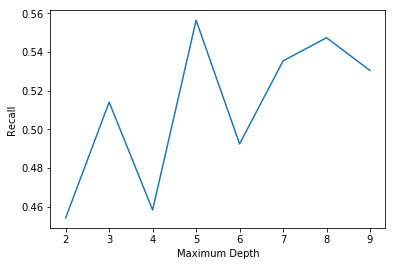

In [168]:
# plot misclassification error vs k
plt.plot(max_depth, cv_scores)
plt.xlabel('Maximum Depth')
plt.ylabel('Recall')
plt.show()

In [169]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
myList = list(range(2,10))
# empty list that will hold cv scores
cv_scores = []
max_depth = []
for k in myList:
    dt = DecisionTreeClassifier(criterion = 'entropy',max_depth=k)
    scores = cross_val_score(dt, x_train, y_train, cv=10, scoring='f1')
    cv_scores.append(scores.mean())
    max_depth.append(k)
MSE = [1 - x for x in cv_scores]
min(MSE)
MSE.index(min(MSE))
best_k = myList[MSE.index(min(MSE))]
print ("The optimal number of max_depth with f1 score metric is %d" % best_k)

The optimal number of max_depth with f1 score metric is 5


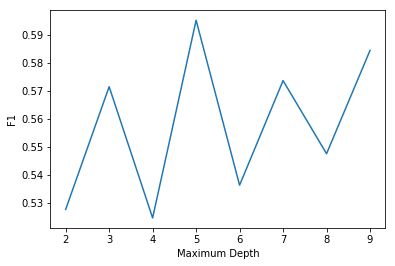

In [170]:
# plot misclassification error vs k
plt.plot(max_depth, cv_scores)
plt.xlabel('Maximum Depth')
plt.ylabel('F1')
plt.show()

- It is seen that 5 is the best depth with respect to all metrics.

#### Hence we use 5 depth. 

#### Building the final model 


In [171]:

final = DecisionTreeClassifier(max_depth=5)
final.fit(x_train,y_train)
predicted = final.predict(x_test)


# Q10 Print the accuracy of the model & print the confusion matrix 

In [172]:
from sklearn.metrics import confusion_matrix
print('Training Accuracy',final.score(x_train, y_train))
print('Testing Accuracy', final.score(x_test, y_test))

Training Accuracy 0.8305400372439479
Testing Accuracy 0.7662337662337663


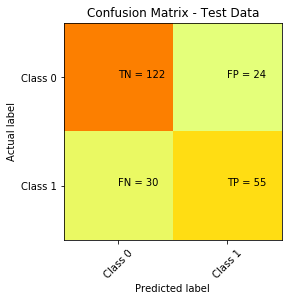

In [173]:
cm = confusion_matrix(y_test, predicted)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Class 0','Class 1']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

Print the feature importance of the decision model - Optional

In [174]:
print("Feature Importance")
final.feature_importances_

Feature Importance


array([0.06336809, 0.41970343, 0.02422905, 0.        , 0.        ,
       0.27143521, 0.10863702, 0.11262721])

- Plas and Mass (these 2 also had highest correlation) seem to be the features of highest importance